# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [10]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\rmwil\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [11]:
# Read your api key environment variable
load_dotenv()
api_key = os.getenv("API_News")

In [12]:
# Create a newsapi client
from newsapi import NewsApiClient
newsapi = NewsApiClient(api_key=api_key)

In [13]:
# Fetch the Bitcoin news articles
btc_headlines = newsapi.get_everything(
    q="bitcoin",
    language="en",
    sort_by="relevancy"
)

In [14]:
# Fetch the Ethereum news articles
eth_headlines = newsapi.get_everything(
    q="ethereum",
    language="en",
    sort_by="relevancy"
)

In [15]:
# Create the Bitcoin sentiment scores DataFrame
sentiments = []

for articles in btc_headlines["articles"]:
    try:
        text = articles["content"]
        results = analyzer.polarity_scores(text)
        compound = results["compound"]
        pos = results["pos"]
        neu = results["neu"]
        neg = results["neg"]

        sentiments.append({
            "text": text,
            "Compound": compound,
            "Positive": pos,
            "Negative": neg,
            "Neutral": neu,
        })
    except AttributeError:
        pass
    
btc  = pd.DataFrame(sentiments)
btc.head()

,text,Compound,Positive,Negative,Neutral
0,Even if you arent paying attention to Bitcoin ...,0.5859,0.124,0.000,0.876
1,El Salvador introduced Bitcoin as a legal tend...,0.3182,0.105,0.000,0.895
2,Israeli national Tal Prihar pled guilty to rou...,-0.3182,0.045,0.084,0.871
3,Netflix\r\n is making a docuseries about one o...,-0.7096,0.000,0.169,0.831
4,British entrepreneur and financier Richard ODe...,0.6808,0.185,0.000,0.815


In [16]:
# Create the Ethereum sentiment scores DataFrame
sentiments = []

for articles in eth_headlines["articles"]:
    try:
        text = articles["content"]
        results = analyzer.polarity_scores(text)
        compound = results["compound"]
        pos = results["pos"]
        neu = results["neu"]
        neg = results["neg"]

        sentiments.append({
            "text": text,
            "Compound": compound,
            "Positive": pos,
            "Negative": neg,
            "Neutral": neu,
        })
    except AttributeError:
        pass
    
eth  = pd.DataFrame(sentiments)
eth.head()

,text,Compound,Positive,Negative,Neutral
0,If people who buy cryptocurrencies intended on...,-0.2023,0.039,0.062,0.899
1,"Technical analysis isnt a perfect tool, but it...",-0.2498,0.000,0.059,0.941
2,This enables an L1 platform to bootstrap its n...,0.0000,0.000,0.000,1.000
3,"The means-and-ends moralists, or non-doers, al...",0.0000,0.000,0.000,1.000
4,People in Colorado will be able to pay their s...,-0.1027,0.000,0.036,0.964


In [17]:
# Describe the Bitcoin Sentiment
btc.describe()

,Compound,Positive,Negative,Neutral
count,20.00000,20.000000,20.000000,20.000000
mean,0.13215,0.086800,0.046500,0.866700
std,0.48400,0.062407,0.057772,0.060835
min,-0.70960,0.000000,0.000000,0.729000
25%,-0.30155,0.043500,0.000000,0.834750
50%,0.26160,0.085500,0.000000,0.873500
75%,0.58590,0.145250,0.090250,0.899750
max,0.77830,0.185000,0.169000,1.000000


In [18]:
# Describe the Ethereum Sentiment
eth.describe()

,Compound,Positive,Negative,Neutral
count,20.000000,20.000000,20.000000,20.000000
mean,0.090060,0.056500,0.029400,0.914150
std,0.336119,0.070124,0.048503,0.088591
min,-0.680800,0.000000,0.000000,0.766000
25%,-0.025675,0.000000,0.000000,0.822500
50%,0.000000,0.042500,0.000000,0.942500
75%,0.232225,0.082750,0.059250,1.000000
max,0.834100,0.234000,0.174000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: ##Bitcoin has the highest mean positive score.

Q: Which coin had the highest compound score?

A: ##Bitcoin has the highest mean positive score.

Q. Which coin had the highest positive score?

A: 

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [19]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [20]:
# Instantiate the lemmatizer
wnl = WordNetLemmatizer() 

# Create a list of stopwords
stop = stopwords.words('english')

# Expand the default stopwords list if necessary
stop.append("u")
stop.append("it'")
stop.append("'s")
stop.append("n't")
stop.append('…')
stop.append("\`")
stop.append('``')
stop.append('char')
stop.append("''")
stop = set(stop)

In [21]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    # Create a list of the words
    words = word_tokenize(text)

    # Convert the words to lowercase
    words = list(filter(lambda w: w.lower(), words))
    
    # Remove the punctuation
    words = list(filter(lambda t: t not in punctuation, words))
    
    # Remove the stopwords
    words = list(filter(lambda t: t.lower() not in stop, words))
    
    # Lemmatize Words into root words
    tokens = [wnl.lemmatize(word) for word in words]
    
    return tokens

In [22]:
# Create a new tokens column for Bitcoin
btc["tokens"] = btc.text.apply(tokenizer)
btc.head()

,text,Compound,Positive,Negative,Neutral,tokens
0,Even if you arent paying attention to Bitcoin ...,0.5859,0.124,0.000,0.876,"[Even, arent, paying, attention, Bitcoin, cryp..."
1,El Salvador introduced Bitcoin as a legal tend...,0.3182,0.105,0.000,0.895,"[El, Salvador, introduced, Bitcoin, legal, ten..."
2,Israeli national Tal Prihar pled guilty to rou...,-0.3182,0.045,0.084,0.871,"[Israeli, national, Tal, Prihar, pled, guilty,..."
3,Netflix\r\n is making a docuseries about one o...,-0.7096,0.000,0.169,0.831,"[Netflix, making, docuseries, one, worst, rapp..."
4,British entrepreneur and financier Richard ODe...,0.6808,0.185,0.000,0.815,"[British, entrepreneur, financier, Richard, OD..."


In [23]:
# Create a new tokens column for Ethereum
eth["tokens"] = eth.text.apply(tokenizer)
eth.head()

,text,Compound,Positive,Negative,Neutral,tokens
0,If people who buy cryptocurrencies intended on...,-0.2023,0.039,0.062,0.899,"[people, buy, cryptocurrencies, intended, hold..."
1,"Technical analysis isnt a perfect tool, but it...",-0.2498,0.000,0.059,0.941,"[Technical, analysis, isnt, perfect, tool, may..."
2,This enables an L1 platform to bootstrap its n...,0.0000,0.000,0.000,1.000,"[enables, L1, platform, bootstrap, national, e..."
3,"The means-and-ends moralists, or non-doers, al...",0.0000,0.000,0.000,1.000,"[means-and-ends, moralist, non-doers, always, ..."
4,People in Colorado will be able to pay their s...,-0.1027,0.000,0.036,0.964,"[People, Colorado, able, pay, state, tax, cryp..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [24]:
from collections import Counter
from nltk import ngrams

In [25]:
# Generate the Bitcoin N-grams where N=2
N = 2
grams = ngrams(tokenizer(btc.text.str.cat()), N)
Counter(grams).most_common(20)

[(('El', 'Salvador'), 3),
 (('Illustration', 'Alex'), 3),
 (('Alex', 'Castro'), 3),
 (('Castro', 'Verge'), 3),
 (('char', 'Feb'), 3),
 (('Reuters', 'Bitcoin'), 3),
 (('alongside', 'US'), 2),
 (('US', 'dollar'), 2),
 (('International', 'Monetary'), 2),
 (('Monetary', 'Fund'), 2),
 (('Mr.', 'Lichtensteins'), 2),
 (('Lichtensteins', 'wallet'), 2),
 (('Even', 'arent'), 1),
 (('arent', 'paying'), 1),
 (('paying', 'attention'), 1),
 (('attention', 'Bitcoin'), 1),
 (('Bitcoin', 'cryptocurrencies'), 1),
 (('cryptocurrencies', 'might'), 1),
 (('might', 'noticed'), 1),
 (('noticed', 'value'), 1)]

In [26]:
# Generate the Ethereum N-grams where N=2
N = 2
grams = ngrams(tokenizer(eth.text.str.cat()), N)
Counter(grams).most_common(20)

[(('char', 'Feb'), 4),
 (('324', 'million'), 4),
 (('char', 'version'), 3),
 (('version', 'article'), 3),
 (('article', 'published'), 3),
 (('published', 'TIME'), 3),
 (('TIME', '’'), 3),
 (('’', 'newsletter'), 3),
 (('newsletter', 'Metaverse'), 3),
 (('Metaverse', 'Subscribe'), 3),
 (('Subscribe', 'weekly'), 3),
 (('weekly', 'guide'), 3),
 (('guide', 'future'), 3),
 (('find', 'past'), 3),
 (('past', 'issue'), 3),
 (('issue', 'newsletter'), 3),
 (('profile', 'picture'), 2),
 (('char', 'Online'), 2),
 (('Online', 'thief'), 2),
 (('thief', 'made'), 2)]

In [27]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [28]:
# Use token_count to get the top 10 words for Bitcoin
all_tokens = tokenizer(btc.text.str.cat())
token_count(all_tokens, 10)

[('char', 20),
 ('Bitcoin', 12),
 ('Reuters', 5),
 ('El', 4),
 ('cryptocurrency', 4),
 ('Salvador', 3),
 ('dollar', 3),
 ('Illustration', 3),
 ('Alex', 3),
 ('Castro', 3)]

In [29]:
# Use token_count to get the top 10 words for Ethereum
all_tokens = tokenizer(eth.text.str.cat())
token_count(all_tokens, 10)

[('char', 19),
 ('cryptocurrency', 6),
 ('newsletter', 6),
 ('million', 5),
 ('Bitcoin', 5),
 ('Ethereum', 4),
 ('token', 4),
 ('Feb', 4),
 ('Reuters', 4),
 ('324', 4)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [41]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

In [46]:
# Generate the Bitcoin word cloud
#def wordcloud(text, title=""):
    df_cloud = Wordcloud(width=500, colormap='RdYlBu').generate(text)
    plt.imshow(df_cloud)
    plt.axis("off")
    fontdict = {"fontsize": 48, "fontweight" : "bold"}
    plt.title(title, fontdict=fontdict)
    plt.show()
                                                    

NameError: name 'title' is not defined

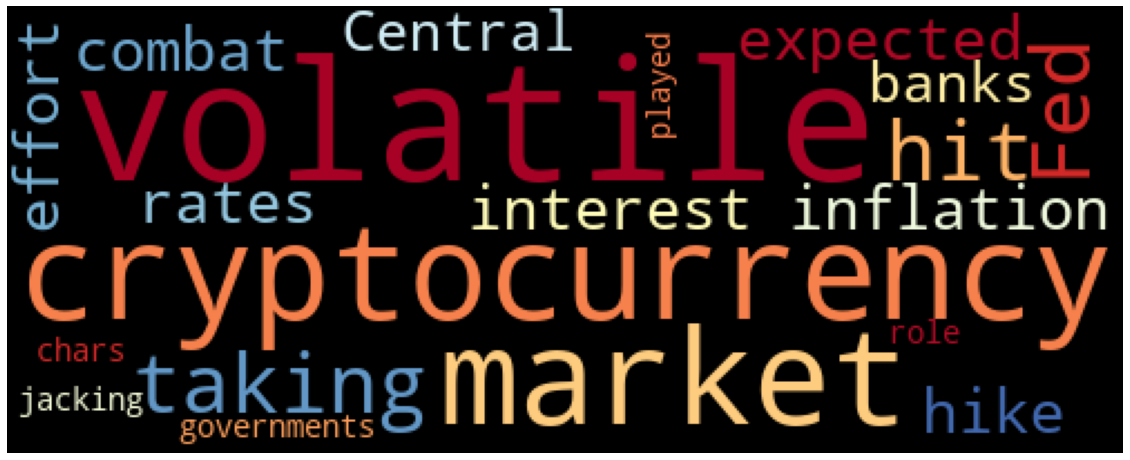

In [53]:
wordcloud = WordCloud(width=500, colormap="RdYlBu").generate(text)
plt.imshow(wordcloud)
plt.axis("off")
fontdict = {"fontsize": 48, "fontweight": "bold"}
plt.title(title, fontdict=fontdict)
plt.show()

In [49]:
Wordcloud(btc.text.str.cat(), title="Bitcoin Word Cloud")

NameError: name 'df_cloud' is not defined

In [54]:
# Generate the Ethereum word cloud
def wordcloud(text, title=""):
    df_cloud = Wordcloud(width=500, colormap='RdYlBu').generate(text)
    plt.imshow(df_cloud)
    plt.axis("off")
    fontdict = {"fontsize": 48, "fontweight" : "bold"}
    plt.title(title, fontdict=fontdict)
    plt.show()
              

In [55]:
wordcloud(btc.text.str.cat(), title="Ethereum Word Cloud")

NameError: name 'Wordcloud' is not defined

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [56]:
import spacy
from spacy import displacy

In [57]:
# Download the language model for SpaCy
# !python -m spacy download en_core_web_sm

In [58]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [59]:
# Concatenate all of the Bitcoin text together
all_btc_text = btc.text.str.cat()
all_btc_text

'Even if you arent paying attention to Bitcoin and other cryptocurrencies, you might have noticed that their value plummeted last week, with the total value of the market tumbling from a high of $3 tr… [+4782 chars]El Salvador introduced Bitcoin as a legal tender alongside the US dollar in 2021. | Illustration by Alex Castro / The Verge\r\n\n \n\n The International Monetary Fund’s executive board has recommended El … [+2691 chars]Israeli national Tal Prihar pled guilty to routing money from kickbacks through Bitcoin and shell companies \r\nIllustration by Alex Castro / The Verge\r\nIn the culmination of a two-year legal process, … [+1448 chars]Netflix\r\n is making a docuseries about one of the worst rappers of all time\r\n. Coincidentally, Heather "Razzlekhan" Morgan and her husband, Ilya Lichtenstein, were charged this week with conspiring t… [+1432 chars]British entrepreneur and financier Richard ODell Poulden hopes that his new venture will relieve the plight of an underserved coho

In [64]:
# Run the NER processor on all of the text
doc = nlp(article)

# Add a title to the document
for ent in doc.ents:
print(ent.text, ent.label_)

IndentationError: expected an indented block (Temp/ipykernel_8756/2486179743.py, line 6)

In [63]:
# Render the visualization
displacy.render(doc, style='ent')

NameError: name 'doc' is not defined

In [30]:
# List all Entities
print([ent.text for ent in doc.ents if ent.label_ == 'GPE'])

---

### Ethereum NER

In [31]:
# Concatenate all of the Ethereum text together
all_eth_text = eth.text.str.cat()
all_eth_text

In [32]:
# Run the NER processor on all of the text
doc = nlp(article)

# Add a title to the document
# YOUR CODE HERE!

In [33]:
# Render the visualization
displacy.render(doc, style='ent')

In [34]:
# List all Entities
print([ent.text for ent in doc.ents if ent.label_ == 'GPE'])

---